# Drone Strikes Effectiveness Analysis
#By- Aarush Kumar
#Dated: Sept. 26,2021

In [2]:
from IPython.display import Image
Image(url='https://media.istockphoto.com/photos/under-digital-earth-picture-id622807606?k=20&m=622807606&s=612x612&w=0&h=OmQZ1pk5Pif-OBZEue7j0scIY6v7VRogLHSCD97Q2Ng=')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from mpl_toolkits.basemap import Basemap

In [4]:
df=pd.read_csv("/home/aarush100616/Downloads/Projects/Drone Strikes/Data/PakistanDroneAttacksWithTemp Ver 11 (November 30 2017).csv", encoding = "ISO-8859-1")

In [5]:
df

S#                         Date   Time  \
0      1.0        Friday, June 18, 2004  22:00   
1      2.0         Sunday, May 08, 2005  23:30   
2      3.0  Thursday, December 01, 2005    NaN   
3      4.0     Friday, January 06, 2006    NaN   
4      5.0     Friday, January 13, 2006   3:00   
..     ...                          ...    ...   
401  403.0         Monday July 03, 2017    NaN   
402  404.0    Friday September 15, 2017    NaN   
403  405.0      Monday October 16, 2017  17:37   
404  406.0    Thursday November 30,2017   4:30   
405    NaN                          NaN    NaN   

                                 Location                 City Province  \
0                               Near Wana     south Waziristan     FATA   
1            Mir Ali (Near Afghan Border)     North Waziristan     FATA   
2                     Haisori- Miran Shah     North Waziristan     FATA   
3    Saidgai village- 115km north of Wana     North Waziristan     FATA   
4                        Damadola Village       Bajaur  Agency     FATA   
..                                    ...                  ...      ...   
401                     Marghalan village     South Waziristan     FATA   
402                            Ghuz Ghari        Kurram Agency     FATA   
403                       Kurram district  Lower Kurram Agency     FATA   
404                near Pak-Afghan border        Kurram Agency     FATA   
405                                   NaN                  NaN      NaN   

     No of Strike  Al-Qaeda  Taliban  Civilians Min  ...  Injured Min  \
0             1.0       NaN      1.0            0.0  ...          NaN   
1             1.0       1.0      NaN            0.0  ...          NaN   
2             1.0       1.0      NaN            0.0  ...          NaN   
3             1.0       NaN      NaN            NaN  ...          NaN   
4             1.0       NaN      NaN            0.0  ...          NaN   
..            ...       ...      ...            ...  ...          ...   
401           2.0       NaN      NaN            0.0  ...          0.0   
402           2.0       NaN      NaN            0.0  ...          2.0   
403           4.0       NaN      5.0            NaN  ...          NaN   
404           2.0       0.0      1.0            2.0  ...          0.0   
405           NaN      49.0    663.0         1306.0  ...        402.0   

     Injured Max  Women/Children    \
0            NaN                 N   
1            NaN                 N   
2            2.0               NaN   
3            2.0               NaN   
4            2.0                 Y   
..           ...               ...   
401          0.0                 N   
402          2.0                 N   
403          NaN                 N   
404          0.0                 N   
405       1329.0               NaN   

                                Special Mention (Site)  \
0    Blast occured in courtyard of the house of lon...   
1    Drone struck a car driven by local warlord- ki...   
2                    Explosive occurred at a mud house   
3                                                  NaN   
4    Three houses were tarheted in Damadola village...   
..                                                 ...   
401  a CIA-operated drone carried out a missile att...   
402  A US drone killed three suspected Afghan Talib...   
403  One of the dead was identified by local offici...   
404     Taliban commander Rasheed, is among the killed   
405                                                NaN   

                                              Comments  \
0                                      Village in Wana   
1    Civilian killied was Samiullah Khan who was a ...   
2    No. 3 Al-Qaeda's Leader AbuHamza Rabia killed ...   
3                                                  NaN   
4    Masood Khan house was among those bombed. Want...   
..                                                 ...   
401                                                NaN   
402        

In [6]:
numerical_cols = ['No of Strike',
       'Al-Qaeda', 'Taliban', 'Civilians Min', 'Civilians Max',
       'Foreigners Min', 'Foreigners Max', 'Total Died Min', 'Total Died Max',
       'Injured Min', 'Injured Max']

In [7]:
# Initial clean up steps
df_clean = df.copy()
df_clean.loc[:,numerical_cols].fillna(0, inplace=True) #replace NaNs with 0
#drop last row that sums values
try: df_clean.drop(df.index[-1], inplace=True) 
except: print('last row already dropped')
df_clean['Date_clean'] = pd.to_datetime(df_clean['Date'], errors='coerce')

In [8]:
df_clean.describe()

S#  No of Strike   Al-Qaeda     Taliban  Civilians Min  \
count  405.000000    405.000000  97.000000  141.000000     336.000000   
mean   203.017284      1.451852   0.505155    4.702128       3.886905   
std    117.087203      1.117271   1.385368    5.164086       5.041826   
min      1.000000      1.000000   0.000000    0.000000      -4.000000   
25%    102.000000      1.000000   0.000000    0.000000       0.000000   
50%    203.000000      1.000000   0.000000    4.000000       3.000000   
75%    304.000000      1.000000   0.000000    7.000000       5.000000   
max    406.000000      8.000000   7.000000   25.000000      40.000000   

       Civilians Max  Foreigners Min  Foreigners Max  Total Died Min  \
count     359.000000       93.000000      140.000000      308.000000   
mean        7.086351        0.731183        2.657143        6.318182   
std         8.348272        1.475450        3.787088        5.265219   
min        -6.000000        0.000000        0.000000        0.000000   
25%         3.000000        0.000000        0.000000        3.000000   
50%         5.000000        0.000000        2.000000        5.000000   
75%         8.000000        0.000000        4.000000        8.000000   
max        82.000000        5.000000       21.000000       40.000000   

       Total Died Max  Injured Min  Injured Max   Longitude    Latitude  \
count      402.000000   145.000000   276.000000  405.000000  405.000000   
mean         9.106965     2.772414     4.815217   68.636460   34.455207   
std          8.097350     3.980412     5.173912    7.300586    7.157904   
min          0.000000     0.000000     0.000000   28.896179   25.678480   
25%          5.000000     0.000000     2.000000   69.900000   32.974600   
50%          6.000000     2.000000     4.000000   70.145500   32.974600   
75%         10.000000     4.000000     6.000000   70.145500   33.033300   
max         82.000000    25.000000    50.000000   71.500000   70.540720   

       Temperature(C)  Temperature(F)  
count      404.000000      404.000000  
mean        16.014691       60.813178  
std          8.626755       15.556719  
min        -14.155000        6.521000  
25%          9.120000       48.416000  
50%         17.895000       64.211000  
75%         23.705000       74.669000  
max         29.485000       85.073000

In [9]:
df_clean.describe().T

count        mean         std        min       25%       50%  \
S#              405.0  203.017284  117.087203   1.000000  102.0000  203.0000   
No of Strike    405.0    1.451852    1.117271   1.000000    1.0000    1.0000   
Al-Qaeda         97.0    0.505155    1.385368   0.000000    0.0000    0.0000   
Taliban         141.0    4.702128    5.164086   0.000000    0.0000    4.0000   
Civilians Min   336.0    3.886905    5.041826  -4.000000    0.0000    3.0000   
Civilians Max   359.0    7.086351    8.348272  -6.000000    3.0000    5.0000   
Foreigners Min   93.0    0.731183    1.475450   0.000000    0.0000    0.0000   
Foreigners Max  140.0    2.657143    3.787088   0.000000    0.0000    2.0000   
Total Died Min  308.0    6.318182    5.265219   0.000000    3.0000    5.0000   
Total Died Max  402.0    9.106965    8.097350   0.000000    5.0000    6.0000   
Injured Min     145.0    2.772414    3.980412   0.000000    0.0000    2.0000   
Injured Max     276.0    4.815217    5.173912   0.000000    2.0000    4.0000   
Longitude       405.0   68.636460    7.300586  28.896179   69.9000   70.1455   
Latitude        405.0   34.455207    7.157904  25.678480   32.9746   32.9746   
Temperature(C)  404.0   16.014691    8.626755 -14.155000    9.1200   17.8950   
Temperature(F)  404.0   60.813178   15.556719   6.521000   48.4160   64.2110   

                     75%        max  
S#              304.0000  406.00000  
No of Strike      1.0000    8.00000  
Al-Qaeda          0.0000    7.00000  
Taliban           7.0000   25.00000  
Civilians Min     5.0000   40.00000  
Civilians Max     8.0000   82.00000  
Foreigners Min    0.0000    5.00000  
Foreigners Max    4.0000   21.00000  
Total Died Min    8.0000   40.00000  
Total Died Max   10.0000   82.00000  
Injured Min       4.0000   25.00000  
Injured Max       6.0000   50.00000  
Longitude        70.1455   71.50000  
Latitude         33.0333   70.54072  
Temperature(C)   23.7050   29.48500  
Temperature(F)   74.6690   85.07300

In [10]:
df_clean['Civilians Min'] = df['Civilians Min'].abs()
df_clean['Civilians Max'] = df['Civilians Max'].abs()
df_clean['Civilians Avg']= df_clean[['Civilians Min','Civilians Max']].mean(axis=1)
df_clean['Militants']= df_clean[['Al-Qaeda','Taliban']].sum(axis=1)

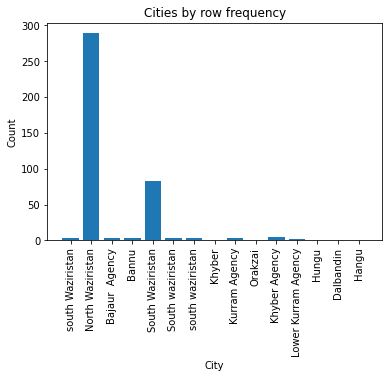

In [11]:
city_dict = Counter(df.loc[df['City'].notnull(), 'City'])
fig, ax = plt.subplots()
ax.bar(city_dict.keys(), city_dict.values())
ax.set_xlabel('City')
ax.set_ylabel('Count')
ax.set_title('Cities by row frequency')
plt.xticks(rotation=90)
plt.show()

In [12]:
df_clean['City'].replace('Hungu', 'Hangu', inplace=True)
df_clean['City'].replace('Khyber', 'Khyber Agency', inplace=True)
df_clean['City'].replace(['south waziristan','south Waziristan','South waziristan'], 'South Waziristan', inplace=True)

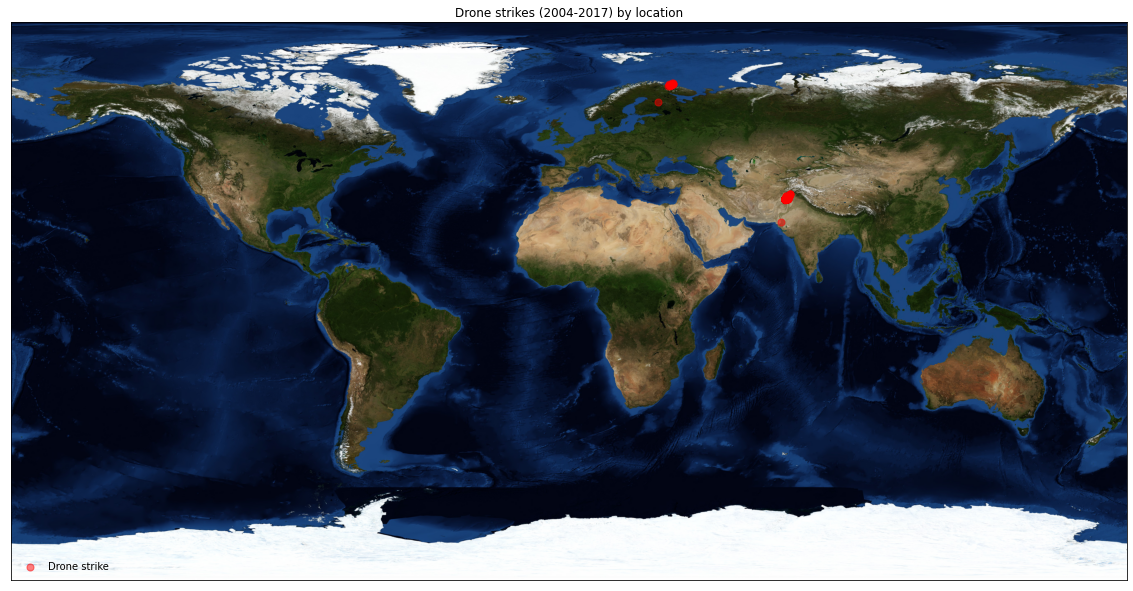

In [13]:
fig, ax = plt.subplots(figsize=(20, 16))
world_map = Basemap(projection='cyl', resolution=None)
                    #llcrnrlat=-90, urcrnrlat=90,
                    #llcrnrlon=-180, urcrnrlon=180)
world_map.bluemarble(scale=0.5)
world_map.scatter(df['Longitude'].values, df['Latitude'].values, latlon=True,
                  s=50, c='red', alpha=0.5)
plt.title('Drone strikes (2004-2017) by location')
plt.scatter([], [], c='red', alpha=0.5, s=50,
                label='Drone strike')
plt.legend(scatterpoints=1, frameon=False,
                labelspacing=1, loc='lower left');
plt.show()

In [14]:
df_clean['Latitude_new'] = np.where(df_clean['Latitude']>40, df_clean['Longitude'], df_clean['Latitude'])
df_clean['Longitude_new'] = np.where(df_clean['Latitude']>40, df_clean['Latitude'], df_clean['Longitude'])

In [15]:
map_df = df_clean.groupby(['Latitude_new', 'Longitude_new']).sum().reset_index()
map_df.sort_values('No of Strike', axis=0, inplace=True)

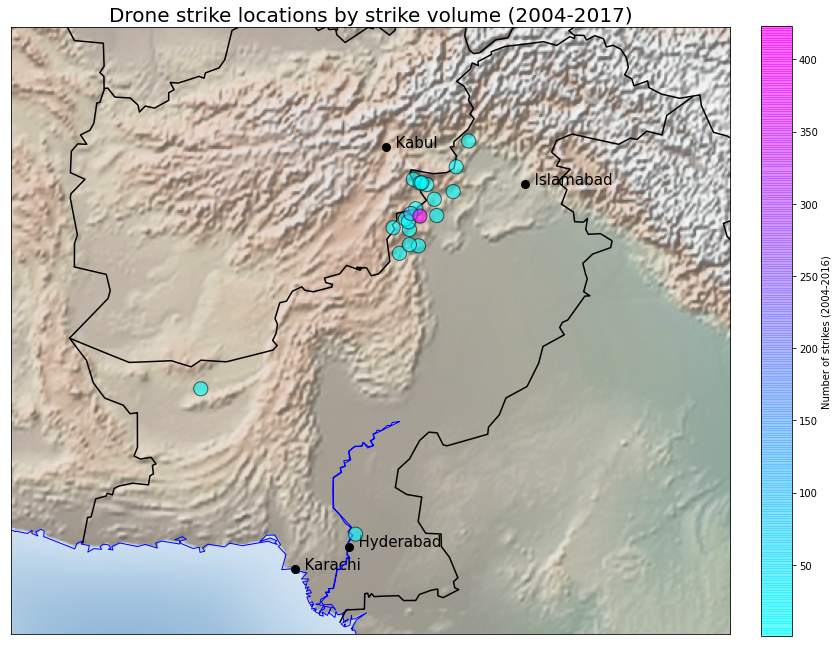

In [16]:
fig = plt.subplots(figsize=(14, 14))
pk_map = Basemap(projection='lcc',
              resolution='l',
              lat_0=30, lon_0=70,
              llcrnrlon=60, llcrnrlat=23,
              urcrnrlon=79, urcrnrlat=37)
pk_map.shadedrelief()
pk_map.drawcoastlines(color='blue')
pk_map.drawcountries(color='k', linewidth=1.5)
pk_map.scatter(map_df['Longitude_new'].values, map_df['Latitude_new'].values, latlon=True,
                s=200,
                c=map_df['No of Strike'].values, edgecolor='k',
                cmap='cool', alpha=0.6, zorder=2)
city_labels = ['  Hyderabad','  Kabul', '  Islamabad', '  Karachi']
city_lonlat = [(68.35, 25.39),(69.20, 34.55), (73.04, 33.68), (67,24.86)]
for (lon, lat), label in zip(city_lonlat, city_labels):
    (lon, lat) = pk_map(lon, lat)
    plt.plot(lon, lat, 'ok', markersize=8)
    plt.text(lon, lat, label, fontsize=15, zorder=1)
plt.colorbar(fraction=0.039, pad=0.04, label=r'Number of strikes (2004-2016)')
plt.title('Drone strike locations by strike volume (2004-2017)', fontsize=20)
plt.show()

/home/aarush100616/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/home/aarush100616/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/aarush100616/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


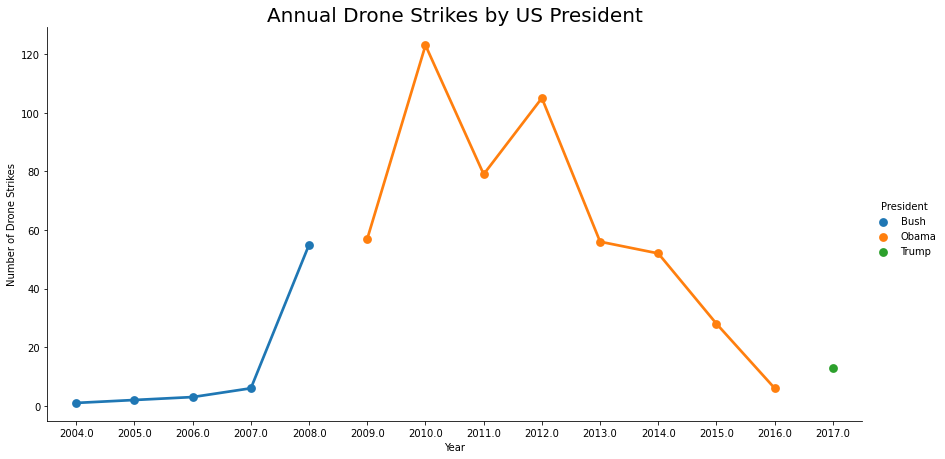

In [17]:
year_df = df_clean.groupby(df_clean['Date_clean'].dt.year)['No of Strike', 'Militants', 'Civilians Avg'].sum().reset_index()
year_df['President'] = year_df['Date_clean'].apply(lambda x: 'Bush' if x < 2009
                                                             else ('Trump' if x > 2016 else 'Obama'))
fig = sns.factorplot(x="Date_clean",y="No of Strike", hue="President", size=6, aspect=2, data=year_df)
plt.xlabel('Year')
plt.ylabel('Number of Drone Strikes')
plt.title("Annual Drone Strikes by US President", fontsize=20)
plt.show()

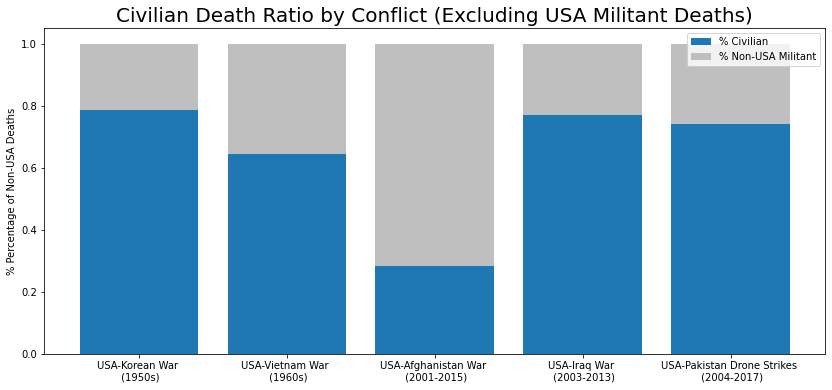

In [18]:
comp_df = pd.DataFrame(columns=['Conflict Name',
                                'Civilian Deaths',
                                'Non-USA Militant Deaths',
                                'USA Militant Deaths'], 
                       data=[
                            ['USA-Korean War \n (1950s)', 2730000, 747000, 40000],
                            ['USA-Vietnam War \n (1960s)', 2000000, 1100000, 58220],
                            ['USA-Afghanistan War \n (2001-2015)', 26000, 66000, 2271],
                            ['USA-Iraq War \n (2003-2013)', 134100, 39900, 4497],
                            ['USA-Pakistan Drone Strikes \n (2004-2017)', df_clean['Civilians Avg'].sum(), df_clean['Militants'].sum(axis=0),0]
                            ])
comp_df['Non-USA Deaths'] = comp_df[['Civilian Deaths', 'Non-USA Militant Deaths']].sum(axis=1)
comp_df['Non-USA Civilian%'] = comp_df['Civilian Deaths']/comp_df['Non-USA Deaths']
comp_df['Non-USA Militant%'] = comp_df['Non-USA Militant Deaths']/comp_df['Non-USA Deaths']
fig = plt.figure(figsize=(14, 6))
p1 = plt.bar(comp_df.index, comp_df['Non-USA Civilian%'])
p2 = plt.bar(comp_df.index, comp_df['Non-USA Militant%'],
             bottom=comp_df['Non-USA Civilian%'],
             color='0.75')
plt.title('Civilian Death Ratio by Conflict (Excluding USA Militant Deaths)', fontsize=20)
plt.ylabel('% Percentage of Non-USA Deaths')
plt.xticks(comp_df.index, comp_df['Conflict Name'])
plt.legend((p1[0], p2[0]), ('% Civilian', '% Non-USA Militant'))
plt.show()

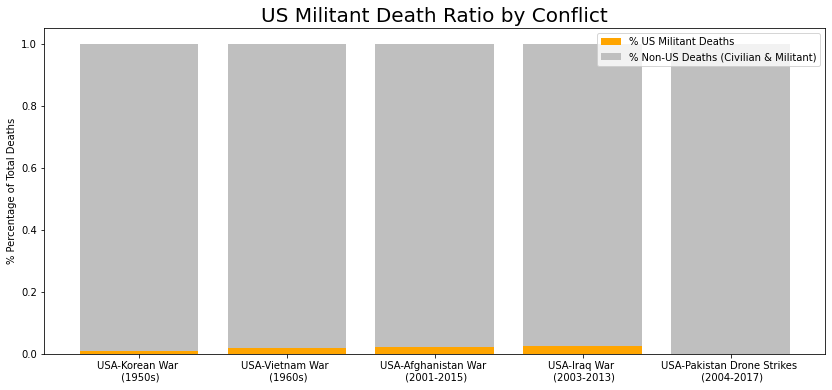

In [19]:
comp_df['Total Deaths'] = comp_df[['Civilian Deaths', 'Non-USA Militant Deaths', 'USA Militant Deaths']].sum(axis=1)
comp_df['Total Non-USA%'] = comp_df[['Civilian Deaths', 'Non-USA Militant Deaths']].sum(axis=1)/comp_df['Total Deaths']
comp_df['Total USA Militant%'] = comp_df['USA Militant Deaths']/comp_df['Total Deaths']
fig = plt.figure(figsize=(14, 6))
p1 = plt.bar(comp_df.index, comp_df['Total USA Militant%'],
             color='orange')
p2 = plt.bar(comp_df.index, comp_df['Total Non-USA%'],
             bottom=comp_df['Total USA Militant%'],
             color='0.75')
plt.title('US Militant Death Ratio by Conflict', fontsize=20)
plt.ylabel('% Percentage of Total Deaths')
plt.xticks(comp_df.index, comp_df['Conflict Name'])
plt.legend((p1[0], p2[0]), ('% US Militant Deaths', '% Non-US Deaths (Civilian & Militant)'))
plt.show()

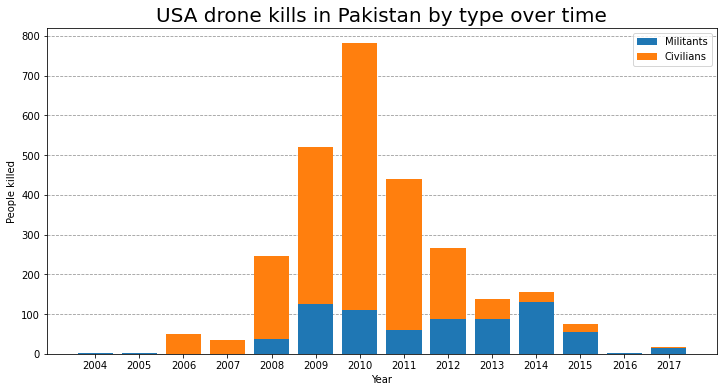

In [20]:
fig = plt.figure(figsize=(12, 6))
p1 = plt.bar(year_df['Date_clean'], year_df['Militants'], zorder=2)
p2 = plt.bar(year_df['Date_clean'], year_df['Civilians Avg'],
             bottom=year_df['Militants'], zorder=2)
plt.ylabel('People killed')
plt.xlabel('Year')
plt.xticks(year_df['Date_clean'])
plt.grid(color='0.6', linestyle='--', axis='y', zorder=1)
plt.title('USA drone kills in Pakistan by type over time', fontsize=20)
plt.legend((p1[0], p2[0]), ('Militants', 'Civilians'))
plt.show()